# Data Generation
As the provided training sample is small, to avoid over fitting to the training data we will generate more data by agumentation. Also as the validation data is small agumentation is required to generate more validation sample.  


first we devide total training data [**164**] to training and validation. A total of **144** images are selected for training and remaining **20** for validation  
***important:*** Training and validation data shoud be separared before any data agumentation.   

We will generate 100 times more data for each **Training** and **Validation** sets  

Keras data agumentation module is used for the task.
There are total 7 types of agumentation performed:
1. image randomly shifted upto +/-40% shift in width
2. image randomly shifted upto +/-40% shift in height
3. image randomly shear 0.2 radians (+/-30 deg shear)
4. upto +/-20% zoom in/out
5. random rotation to any angle
6. flipping images hozontally
7. flipping images vertically

***important:*** While doing agumentation we must apply same transformation to the mask aswell.  



fills new created space with 0


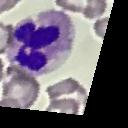

In [17]:
# Data Generation in the Constand Mode: fills new created space with 0
# We will be using this for our training as it make two class balance
from IPython.display import Image, display
print("fills new created space with 0")
Image(filename='ag_val_constant/img_0_0_1069.jpeg')


fills new created space with Mirror Image


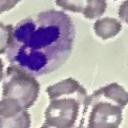

In [18]:
# Data Generation in the reflex Mode: fills new created space with Mirror Image
print("fills new created space with Mirror Image")
Image(filename='ag_val_reflect/img_0_0_1069.jpeg')

In [1]:
import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import os
from scipy.misc import imread
import keras
import keras.backend as K

Using TensorFlow backend.


In [ ]:
# import copy
# import numpy as np

# from keras.models import Sequential, Model
# from keras.layers import Input, Dropout, Permute, Add, add, BatchNormalization, Activation, UpSampling2D
# from keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, Deconvolution2D, Cropping2D, AtrousConv2D
#from model_WBC import getModelMask5
#model.predict(np.random.random((1,3,128,128))).shape

In [2]:
# Training and Validation Split
#Out of 164, Training = 144, Validation = 20
train_data='Train_Data'
#test_data ='Test_Data'
Train_list= os.listdir(train_data)
X=[]
Y=[]
for f in Train_list:
    if not f.endswith('mask.jpg'):
        #print([train_data+os.sep+f])
        X.append(imread(train_data+os.sep+f)/255)
        Y.append(imread(train_data+os.sep+f[:-4]+'-mask.jpg')/255)
X=np.transpose(X,(0,3,1,2))
Y=np.expand_dims(Y,axis=1)
from random import randint, seed,shuffle
seed(0)
shuffle(X)
seed(0)
shuffle(Y)

# before data agumentation data is devided into Training and Validation sets
X_train=X[:-20] # 144 files are for training
Y_train=Y[:-20]
X_val=X[-20:] # 20 files are for validation ~12%
Y_val=Y[-20:]

## Data Generation
 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(fill_mode='constant', rotation_range=360,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2, width_shift_range =0.33, height_shift_range =0.33)
#mask=[]
#img=[]
counter=0;tot=100*len(X_train);tot_val=100*len(X_val)
# width_shift_range =0.4  [20% shift ]
# height_shift_range =0.4 [20% shift ]
# shear_range= 0.2        [in radians ~30 deg shear]
# zoom_range=  0.2        [20% of zoom in and zoom out]
# rotation_range = 360 [upto full 360 rotation]
# horizontal_flip=True    
# vertical_flip=True

for batch in datagen.flow(X_train, batch_size=1, seed=1337,shuffle=False,save_to_dir='ag_train_constant',save_prefix='img_'+str(counter)): 
    #img.append(batch)
    counter+=1
    if(counter>tot): counter=0; break
for batch in datagen.flow(Y_train, batch_size=1, seed=1337,shuffle=False,save_to_dir='ag_train_constant',save_prefix='msk_'+str(counter)): 
    #mask.append(batch)
    counter+=1
    if(counter>tot): counter=0; break
for batch in datagen.flow(X_val, batch_size=1, seed=1337,shuffle=False,save_to_dir='ag_val_constant',save_prefix='img_'+str(counter)): 
    #img.append(batch)
    counter+=1
    if(counter>tot_val): counter=0; break
for batch in datagen.flow(Y_val, batch_size=1, seed=1337,shuffle=False,save_to_dir='ag_val_constant',save_prefix='msk_'+str(counter)): 
    #mask.append(batch)
    counter+=1
    if(counter>tot_val): counter=0; break        


In [ ]:
# A=myGenerator()
# X11,Y11=next(A)
# plt.figure()
# plt.imshow(X11[0][0])
# plt.figure()
# plt.imshow(Y11[0][0])